In [1]:
import os
import subprocess
import datetime
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import *
from pyspark.sql.types import *

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [3]:
df = spark.read.parquet('gs://ads-sjhuang-final/notebooks/sjhuang/sample01')

In [4]:
df.limit(5)

repo_name,commit,author_name,timestamp,subject,message,date,name,license
00s/angular.js,aac68bf2ba2dcdf0b...,Vojta Jina,1314965613,fix(scenario): te...,fix(scenario): te...,2011-09-02,"[CSS, JavaScript,...",mit
00s/angular.js,4dc9e6416a465eb7e...,Igor Minar,1312480097,doc(tutorial): up...,doc(tutorial): up...,2011-08-04,"[CSS, JavaScript,...",mit
00s/angular.js,b103fae8c7dd77ce4...,Brian Ford,1381534477,docs(tutorial/ste...,docs(tutorial/ste...,2013-10-11,"[CSS, JavaScript,...",mit
00s/angular.js,bcf72cacb5afcbeb6...,rodyhaddad,1401729456,revert: feat(*): ...,revert: feat(*): ...,2014-06-02,"[CSS, JavaScript,...",mit
00s/angular.js,72e46548b86933570...,Vojta Jina,1311797931,test(filter.date)...,test(filter.date)...,2011-07-27,"[CSS, JavaScript,...",mit


In [5]:
df.cache()

repo_name,commit,author_name,timestamp,subject,message,date,name,license
0-1-0/Python-Ardu...,a44ff2e41d579c2dc...,Tristan Hearn,1344558834,first commit,first commit,2012-08-10,[],mit
0-1-0/Python-Ardu...,d19b0471b2aaa4fea...,Tristan Hearn,1367269467,Update README.md,Update README.md,2013-04-29,[],mit
00k/mdt,de64d25fdcca3346c...,caijieming,1444628053,#33 : high concu...,#33 : high concu...,2015-10-12,"[C, C++, Go, Make...",bsd-3-clause
01org/dleyna-server,dcc30693f0217be17...,Emanuele Aina,1375893522,[Build] Ship the ...,[Build] Ship the ...,2013-08-07,"[C, C++, M4, Make...",lgpl-2.1
01org/mayloon-por...,d46374253665ae67c...,"Sun, Xun",1369743141,"Merge ""partly rec...","Merge ""partly rec...",2013-05-28,"[CSS, Java, JavaS...",epl-1.0
01org/mayloon-por...,f9aee875364625c4b...,Xun Sun,1368422257,"Merge ""Add licens...","Merge ""Add licens...",2013-05-13,"[CSS, Java, JavaS...",epl-1.0
01org/mayloon-por...,b28550f42c311f4a4...,ruiyang,1370418497,change feature ve...,change feature ve...,2013-06-05,"[CSS, Java, JavaS...",epl-1.0
01org/mayloon-por...,7dde8c6f7d6a8174c...,GuoZhihao,1385950412,Fix Bug 1971 - 4 ...,Fix Bug 1971 - 4 ...,2013-12-02,"[CSS, Java, JavaS...",epl-1.0
01org/mayloon-por...,1af414dd9c5cd62b4...,xuguoan,1366793436,fixed bug 736 J2S...,fixed bug 736 J2S...,2013-04-24,"[CSS, Java, JavaS...",epl-1.0
0359xiaodong/Andr...,bf3194463a19156b2...,Ahmed,1352586266,Added LICENSE and...,Added LICENSE and...,2012-11-10,[],apache-2.0


### Timeline Analysis

In [6]:
time_df = df.groupBy(date_format(col("date"), "yyyy").alias("yyyy"))\
            .agg(count("*").alias("count"))
time_df = time_df.orderBy("yyyy")

In [7]:
time_pd_df = time_df.toPandas()

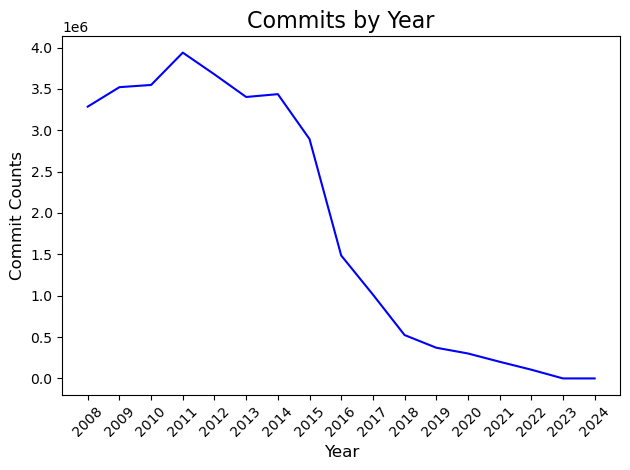

In [8]:
plt.plot(time_pd_df['yyyy'], time_pd_df['count'], linestyle='-', color='b')
plt.title("Commits by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Commit Counts", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [9]:
#check for month 
month_df = df.filter((col("date") > "2009-12-31") & (col("date") < "2023-01-01")) \
            .groupBy(date_format(col("date"), "yyyy-MM").alias("yyyy_mm"))\
            .agg(count("*").alias("count"))
month_df = month_df.orderBy("yyyy_mm")

In [10]:
month_pd_df = month_df.toPandas()

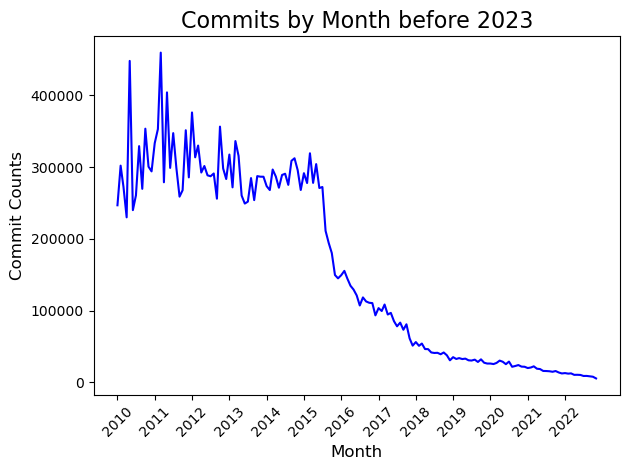

In [13]:
month_pd_df['yyyy_mm'] = pd.to_datetime(month_pd_df['yyyy_mm'], format='%Y-%m')
ticks_to_show = month_pd_df['yyyy_mm'][month_pd_df['yyyy_mm'].dt.month == 1]  # Select January of each year
tick_labels = ticks_to_show.dt.strftime('%Y')  # Format as year

plt.plot(month_pd_df['yyyy_mm'], month_pd_df['count'], linestyle='-', color='b')
plt.title("Commits by Month before 2023", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Commit Counts", fontsize=12)
plt.xticks(ticks_to_show, tick_labels, rotation=45)  # Set x-axis ticks and labels

plt.tight_layout()
plt.show()


### Programing Language Analysis

In [38]:
lang_df = df.filter(size(col("name")) > 0)\
            .withColumn("language", explode(col("name")))
lang_df = lang_df.groupBy("language").count().orderBy("count", ascending=False)
lang_df.limit(10)

language,count
Shell,27069269
Python,23594035
C,21276922
C++,20769607
Perl,19962187
Objective-C,18973509
Makefile,18288914
Assembly,18058702
Awk,16410292
UnrealScript,14999006


In [43]:
lang_df_pd = lang_df.toPandas()

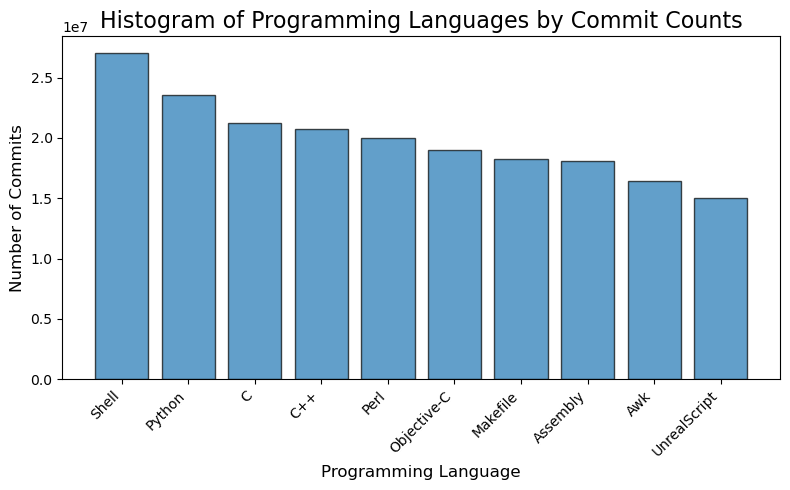

In [53]:
languages = lang_df_pd.head(10)['language']
counts = lang_df_pd.head(10)['count']
# Plot the histogram
plt.figure(figsize=(8,5))
plt.bar(languages, counts, edgecolor="black", alpha=0.7)

# Add titles and labels
plt.title("Histogram of Programming Languages by Commit Counts", fontsize=16)
plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Number of Commits", fontsize=12)

# Adjust x-axis for better readability
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate labels and align

plt.tight_layout()
plt.show()

In [46]:
year_lang_df = df.filter(size(col("name")) > 0)\
                 .withColumn("language", explode(col("name")))\
                 .withColumn('year', year(col("date")))

In [50]:
from pyspark.sql.window import Window
# Group by year and language to calculate the count of each language per year
lang_year_df = year_lang_df.filter(col("year") < 2023).groupBy("year", "language").count()

# Define a window specification to rank languages by count for each year
window_spec = Window.partitionBy("year").orderBy(col("count").desc())

# Add a rank column to determine the top 3 languages per year
ranked_lang_df = lang_year_df.withColumn("rank", rank().over(window_spec))

# Filter for the top 3 languages per year
top3_lang_per_year = ranked_lang_df.filter(col("rank") <= 5).orderBy("year", "rank")

# Show the result
top3_lang_per_year.show(50, truncate=False)

+----+----------+-------+----+
|year|language  |count  |rank|
+----+----------+-------+----+
|2008|Shell     |3078143|1   |
|2008|Python    |3011432|2   |
|2008|C         |2989155|3   |
|2008|C++       |2975125|4   |
|2008|Perl      |2968402|5   |
|2009|Shell     |3281265|1   |
|2009|Python    |3168393|2   |
|2009|C         |3149013|3   |
|2009|C++       |3136332|4   |
|2009|Perl      |3117901|5   |
|2010|Shell     |3239535|1   |
|2010|Python    |3067516|2   |
|2010|C++       |2994509|3   |
|2010|C         |2990790|4   |
|2010|Perl      |2939296|5   |
|2011|Shell     |3574744|1   |
|2011|Python    |3374015|2   |
|2011|C++       |3235941|3   |
|2011|C         |3235798|4   |
|2011|Perl      |3146125|5   |
|2012|Shell     |3233895|1   |
|2012|Python    |2949031|2   |
|2012|C++       |2697318|3   |
|2012|C         |2674603|4   |
|2012|Perl      |2586158|5   |
|2013|Shell     |2868210|1   |
|2013|Python    |2384587|2   |
|2013|C         |2048148|3   |
|2013|C++       |2027014|4   |
|2013|Ma

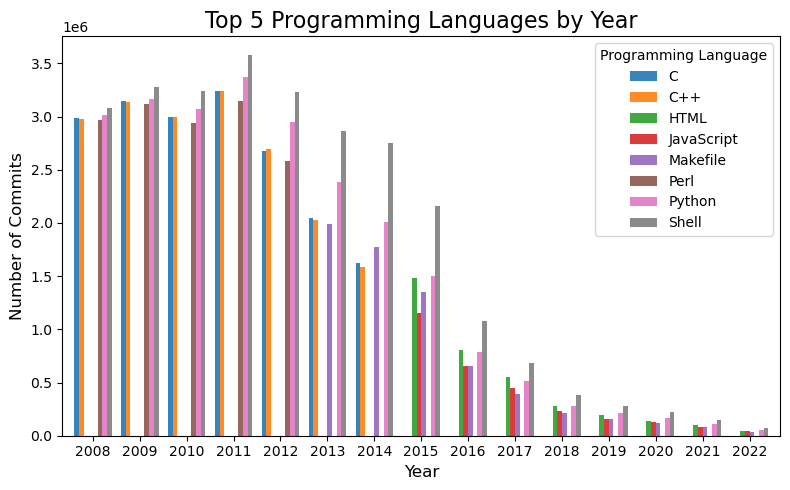

In [54]:
year_pd_df = top3_lang_per_year.toPandas()

# Pivot the DataFrame to prepare it for visualization
pivot_df = year_pd_df.pivot(index="year", columns="language", values="count").fillna(0)

# Plot the grouped bar chart
pivot_df.plot(kind="bar", figsize=(8, 5), width=0.8, alpha=0.9)

# Add titles and labels
plt.title("Top 5 Programming Languages by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Commits", fontsize=12)

# Customize x-axis
plt.xticks(rotation=0, fontsize=10)

# Add legend
plt.legend(title="Programming Language", fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()


### License Analysis

In [38]:
l_df = df.groupBy("license").count().orderBy("count", ascending=False)
l_df.limit(10)

license,count
gpl-2.0,19122759
mit,3720500
apache-2.0,3142465
gpl-3.0,1608828
bsd-3-clause,1297563
bsd-2-clause,1159373
agpl-3.0,884882
lgpl-2.1,253058
mpl-2.0,192059
lgpl-3.0,119767


In [43]:
df_license_language = df.filter(size(col("name")) > 0)\
                        .withColumn("language", explode(col("name")))\
                        .select("language", "license")

In [ ]:
df_gpl = df_license_language.filter(col("license") == "gpl-2.0")\
                            .groupby("language").count().orderBy("count", ascending=False)
df_gpl.limit(5)

In [47]:
df_mit = df_license_language.filter(col("license") == "mit")\
                            .groupby("language").count().orderBy("count", ascending=False)
df_mit.limit(5)

language,count
JavaScript,2188021
HTML,2069341
Shell,1991928
CSS,1893952
Python,970283


In [50]:
df_apache = df_license_language.filter(col("license") == "apache-2.0")\
                                .groupby("language").count().orderBy("count", ascending=False)
df_apache.limit(5)

language,count
Shell,2588017
HTML,1930950
Python,1894052
Makefile,1534552
JavaScript,1331347


In [51]:
df_bsd = df_license_language.filter(col("license") == "bsd-3-clause")\
                                .groupby("language").count().orderBy("count", ascending=False)
df_bsd.limit(5)

language,count
Shell,957699
Python,843881
JavaScript,694529
Makefile,648707
HTML,627546


### Repository Analysis

In [53]:
df_repo = df.groupBy("repo_name")\
            .agg(count("*").alias("total_commits"),\
                 max("date").alias("last_commit"),\
                 min("date").alias("first_commit"),\
                 datediff(max("date"), min("date")).alias("days_active"))

In [55]:
df_repo = df_repo.orderBy(col("total_commits").desc(), col("days_active").desc())

In [57]:
df_repo.limit(10)

repo_name,total_commits,last_commit,first_commit,days_active
shenzhouzd/update,11907,2018-04-16,2013-12-05,1593
chromium/chromium,11826,2022-11-24,2008-01-07,5435
scheib/chromium,10882,2022-03-21,2008-01-07,5187
cminyard/linux-li...,10084,2022-03-25,2008-01-01,5197
frustreated/linux,9968,2022-03-16,2008-01-01,5188
fabiocannizzo/linux,9935,2022-01-14,2008-01-01,5127
mpe/powerpc,9785,2021-11-06,2008-01-01,5058
rperier/linux,9745,2021-11-01,2008-01-01,5053
tprrt/linux-stable,9679,2021-10-19,2008-01-01,5040
HinTak/linux,9364,2021-06-02,2008-01-01,4901


### Commiter Analysis

In [17]:
df_committer = df.groupby("author_name").count().orderBy("count", ascending=False)

In [18]:
df_committer.limit(5)

author_name,count
Linus Torvalds,571608
Linux Build Servi...,297085
Ingo Molnar,199797
Mark Brown,189436
Al Viro,159516


In [27]:
committer_pd = df_committer.toPandas()

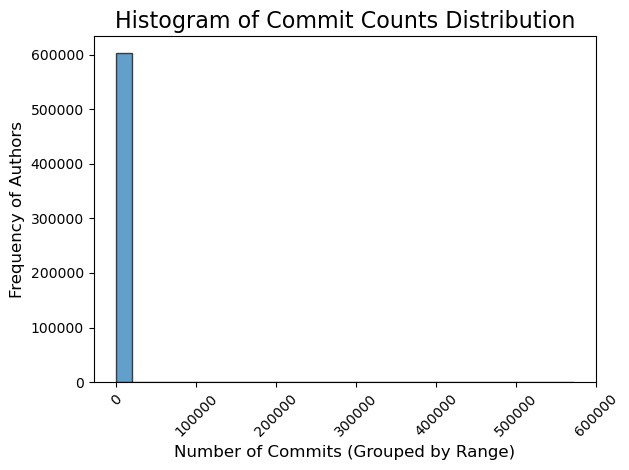

In [37]:
plt.hist(committer_pd['count'], bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram of Commit Counts Distribution", fontsize=16)
plt.xlabel("Number of Commits (Grouped by Range)", fontsize=12)
plt.ylabel("Frequency of Authors", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

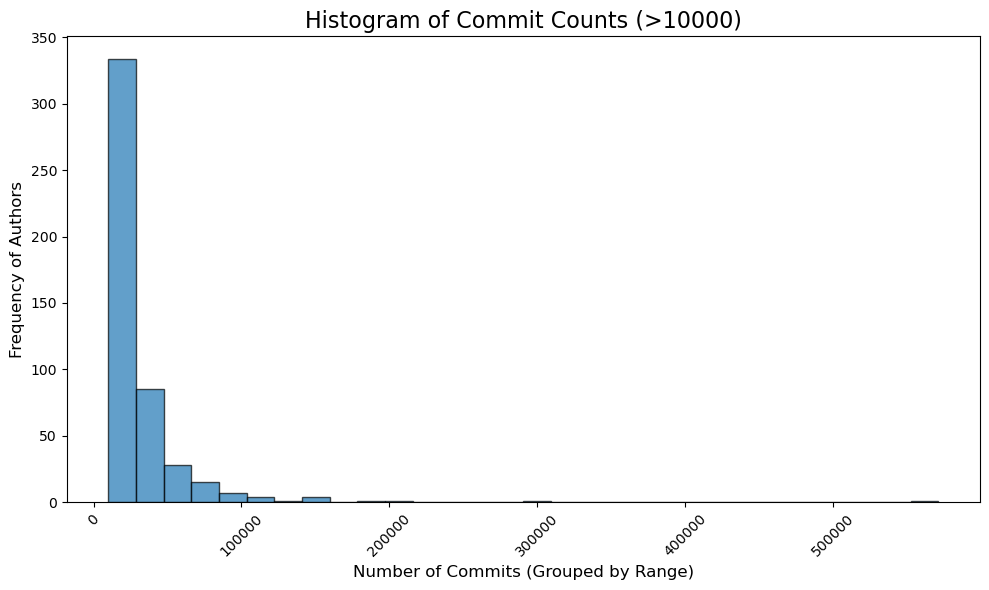

In [35]:
filtered_commit_counts = committer_pd[committer_pd["count"] > 10000]["count"]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_commit_counts, bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram of Commit Counts (>10000)", fontsize=16)
plt.xlabel("Number of Commits (Grouped by Range)", fontsize=12)
plt.ylabel("Frequency of Authors", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()